# Basic use of the relative feature tightness measure

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv


from ast import literal_eval
import re
import sys
sys.path.insert(0,"./../fip3")
from fip import profiles

## Dataset prep

In [17]:
DATASET_NAME = 'COCONUT'
DATASET_LINK = '../data/CP1/COCONUT/COCOrandom.csv'
OUTPUT_FIGURE_PATH = '../images/'

FEATURES_NAME = 'ECFP2-like substructures'
COOCCURRENCE_MX_LINK = '../data/CP1/COCONUT/COCOp_386297.csv'
COOCCURRENCE_MX_VECTOR_COUNT = 386297

#MINIMAL_COOCCURRENCE_CUTOFF = 100  # How many co-occurrences are needed to start tracking the relation

REFERENCE_DATASET_NAME = 'ZINC'
REFERENCE_DATASET_LINK = '../data/CP1/ZINC/ZINCrandom.csv'
REFERENCE_COOCCURRENCE_MX_LINK = '../data/CP1/ZINC/ZINCp_379012.csv'
REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT = 379012

# Derived from primary dataset, adjusted for size difference
#REFERENCE_MINIMAL_COOCCURRENCE_CUTOFF = int(MINIMAL_COOCCURRENCE_CUTOFF * (REFERENCE_COOCCURRENCE_MX_VECTOR_COUNT / COOCCURRENCE_MX_VECTOR_COUNT))

DATASET_SAMPLE_SIZE = 38630

### Making feature pointwise mutual information profiles

In [18]:
profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/COCONUT/COCOp_386297.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=386297)
profile.df

value
feature1 feature2       
0        0          3426
         1          1169
         10          153
         100          51
         1000         46
...                  ...
997      998           7
         999          18
998      998        3208
         999          96
999      999        7175

[2096060 rows x 1 columns]

In [19]:
probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(profile)
probability_profile.df

value
feature1 feature2          
0        0         0.008869
         1         0.003026
         10        0.000396
         100       0.000132
         1000      0.000119
...                     ...
997      998       0.000018
         999       0.000047
998      998       0.008304
         999       0.000249
999      999       0.018574

[2096060 rows x 1 columns]

In [20]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(probability_profile)
pmi_profile

In [21]:
reference_profile = profiles.CooccurrenceProfile.from_dataframe(pd.read_csv('../data/CP1/ZINC/ZINCp_379012.csv', dtype={'feature1': 'str','feature2' : 'str' }), vector_count=379012)
reference_profile.df

value
feature1 feature2       
0        0           814
         1           158
         10            6
         1000          4
         1001          3
...                  ...
997      998          16
         999          44
998      998        2788
         999          63
999      999        4474

[2077720 rows x 1 columns]

In [22]:
reference_probability_profile = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(reference_profile)
reference_probability_profile.df

value
feature1 feature2          
0        0         0.002148
         1         0.000417
         10        0.000016
         1000      0.000011
         1001      0.000008
...                     ...
997      998       0.000042
         999       0.000116
998      998       0.007356
         999       0.000166
999      999       0.011804

[2077720 rows x 1 columns]

In [23]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(reference_probability_profile)
reference_pmi_profile

### Making feature pointwise mutual information profiles

In [15]:
pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(
    probability_profile)
pmi_profile.df

KeyError: 0

In [16]:
reference_pmi_profile = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(
    reference_probability_profile)
reference_pmi_profile.df

KeyError: 0

### Making feature pointwise KL divergence profile between COCONUT and ZINC

In [24]:
difference_pkld_profile = profiles.PointwiseKLDivergenceProfile.from_cooccurrence_probability_profiles(
    probability_profile, reference_probability_profile)
difference_pkld_profile.df

value
feature1 feature2          
0        0         2.045958
         1         2.859812
         10        4.644958
         100       5.644962
         1000      3.496095
...                     ...
928      972      -0.027471
939      986      -1.027471
959      995      -0.027471
968      990      -3.834826
969      995      -0.027471

[2098061 rows x 1 columns]

### Sampling structures from ChEMBL and ZINC datasets

In [25]:
coconut_samples = pd.read_csv('../data/CP1/COCONUT/COCOrandom.csv', delimiter = ' ').sample(DATASET_SAMPLE_SIZE)
coconut_samples = coconut_samples.drop(['Coconut_id'], axis=1)
coconut_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
77600,C=C(C)C=CC1CC23CC(CC=C(C)C)C(C)(C)OC2=C(C(=O)c...,600.345089,8.36530,YTTUPQPCNJRCIF-UHFFFAOYSA-N,YTTUPQPCNJRCIF,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[9, 14, 31, 67, 80, 125, 139, 181, 314, 315, 3..."
337896,C=C(C)C(=O)CCC1(C)OC(=O)C23CC=C4C(CCC5C4(C)CCC...,1406.635421,-4.08830,UDLZXQNHXOBDQC-UHFFFAOYSA-N,UDLZXQNHXOBDQC,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[10, 22, 61, 70, 78, 80, 107, 222, 249, 252, 2..."
119458,COc1cc(-c2cc(=O)c3c(O)cc(O)c(CC=C(C)CCC=C(C)C)...,436.188589,5.82060,PPYVSZXPYMTRKN-UHFFFAOYSA-N,PPYVSZXPYMTRKN,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[54, 80, 101, 104, 121, 133, 249, 250, 314, 35..."
369927,CC1(CO)C(O)CCC2(C)C(CC(=O)N3CCC(C(N)=O)CC3)c3n...,512.245727,2.73460,UWHSMGLTNYFWNS-UHFFFAOYSA-N,UWHSMGLTNYFWNS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[42, 60, 80, 94, 95, 111, 140, 162, 173, 175, ..."
283249,CC(C)Cn1cc(C(=O)NC2CCOC(C)(C)C2)c2ccccc2c1=O,356.209993,3.34490,UBFBIXJEDFTJQW-UHFFFAOYSA-N,UBFBIXJEDFTJQW,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 61, 62, 80, 225, 268, 272, 283, 299, 314, ..."
...,...,...,...,...,...,...,...,...
184770,COc1cc(OC)c2c(C)c(CC(=O)NC(Cc3ccccc3)C(=O)[O-]...,424.140176,1.13852,OJHFRIXGYNNJQJ-UHFFFAOYSA-M,OJHFRIXGYNNJQJ,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 41, 79, 80, 117, 249, 252, 305, 314, 322, ..."
257243,CC(C)c1cc2c(cc1O)C13CCCC(C)(COC1O)C3CC2,316.203845,3.85460,QVGFDWPRYXYPGU-UHFFFAOYSA-N,QVGFDWPRYXYPGU,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 67, 104, 121, 137, 237, 283, 401, 470, 478..."
357547,COc1ccc(C2C(C#N)=C(N)Oc3c2c(=O)oc2ccccc32)cc1C...,484.118985,5.45838,OZKJEXDISKZDJK-UHFFFAOYSA-N,OZKJEXDISKZDJK,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[46, 52, 80, 94, 216, 217, 239, 249, 305, 310,..."
299169,COc1ccc(C2COc3cc(OC)c(O)cc3C2O)cc1,302.115424,2.61900,OWZQLGWYJGXUMM-UHFFFAOYSA-N,OWZQLGWYJGXUMM,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[40, 66, 164, 171, 249, 303, 322, 441, 455, 61..."


In [26]:
zinc_samples = pd.read_csv(REFERENCE_DATASET_LINK, delimiter = ' ').sample(DATASET_SAMPLE_SIZE)
zinc_samples = zinc_samples.drop(['Zinc_id'], axis=1)
zinc_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
2254,O=C(C1CCCC1)N1CCC[C@@H](c2nc(N3CCOCC3)ncc2-c2c...,421.247775,3.27140,XUUNEIOKLUCXOW-HXUWFJFHSA-N,XUUNEIOKLUCXOW,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[53, 82, 257, 258, 352, 369, 378, 407, 431, 43..."
337810,O=C(c1ccccc1)[C@@H](Sc1nnc(-c2cccc(Br)c2)n1-c1...,525.051045,7.41310,GZTCAFFMMQJPPQ-SANMLTNESA-N,GZTCAFFMMQJPPQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 58, 102, 116, 270, 351, 352, 378, 386, 389..."
187626,COc1cc(CCNS(C)(=O)=O)c(S(=O)(=O)Nc2ccc(N3CCOCC...,648.159356,0.45380,JTJIGSWYBOYLOF-UHFFFAOYSA-N,JTJIGSWYBOYLOF,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 191, 199, 231, 249, 314, 350, 366, 392, 4..."
239133,Cc1ccc2cc(CN(Cc3ccccc3)C(=S)NC[C@@H]3CCCO3)c(=...,435.198048,4.20064,GRLQAYUUGVJFLT-QFIPXVFZSA-N,GRLQAYUUGVJFLT,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[80, 97, 110, 197, 203, 239, 248, 252, 314, 36..."
43239,CCOc1ccc2nc(N3CCN(C(=O)c4nn(C)cc4C)CC3)sc2c1,385.157246,2.69932,XRHHTRJWNNYQRL-UHFFFAOYSA-N,XRHHTRJWNNYQRL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[69, 80, 99, 162, 237, 294, 322, 378, 407, 464..."
...,...,...,...,...,...,...,...,...
291447,CC(=O)Nc1ccc(CCC2(NC(=O)C[C@@H]3NC(=O)c4ccccc4...,434.231791,3.66650,FGDPBJBQXPNJCL-NRFANRHFSA-N,FGDPBJBQXPNJCL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 41, 80, 115, 143, 245, 301, 310, 313, 314,..."
129762,C=C(C)C[C@H](C)C(=O)N[C@@H]1CN(Cc2cccc(CC)c2)C...,344.246378,3.16670,QRFGJTUYEAAZKA-PWIZWCRZSA-N,QRFGJTUYEAAZKA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 22, 52, 80, 96, 145, 209, 215, 283, 294, 3..."
299121,Cc1nc([C@@H]2CCCCN2CC(=O)Nc2ccc3ncccc3c2)nc2c1...,444.227374,3.40792,SGUHHBWBOPMTLC-NRFANRHFSA-N,SGUHHBWBOPMTLC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 92, 115, 130, 160, 184, 191, 192, 212..."
216510,COc1cccc2c1OCc1cn(nn1)CCCOc1ccc(F)cc1C(=O)N1CC...,551.254397,2.88640,OXAUKGHCDDTXRQ-ONOMSOESSA-N,OXAUKGHCDDTXRQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 86, 110, 155, 192, 210, 249, 314, 338..."


In [27]:
joint_samples = pd.concat((coconut_samples, zinc_samples), ignore_index=True)

In [28]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,C=C(C)C=CC1CC23CC(CC=C(C)C)C(C)(C)OC2=C(C(=O)c...,600.345089,8.36530,YTTUPQPCNJRCIF-UHFFFAOYSA-N,YTTUPQPCNJRCIF,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[9, 14, 31, 67, 80, 125, 139, 181, 314, 315, 3..."
1,C=C(C)C(=O)CCC1(C)OC(=O)C23CC=C4C(CCC5C4(C)CCC...,1406.635421,-4.08830,UDLZXQNHXOBDQC-UHFFFAOYSA-N,UDLZXQNHXOBDQC,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[10, 22, 61, 70, 78, 80, 107, 222, 249, 252, 2..."
2,COc1cc(-c2cc(=O)c3c(O)cc(O)c(CC=C(C)CCC=C(C)C)...,436.188589,5.82060,PPYVSZXPYMTRKN-UHFFFAOYSA-N,PPYVSZXPYMTRKN,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[54, 80, 101, 104, 121, 133, 249, 250, 314, 35..."
3,CC1(CO)C(O)CCC2(C)C(CC(=O)N3CCC(C(N)=O)CC3)c3n...,512.245727,2.73460,UWHSMGLTNYFWNS-UHFFFAOYSA-N,UWHSMGLTNYFWNS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[42, 60, 80, 94, 95, 111, 140, 162, 173, 175, ..."
4,CC(C)Cn1cc(C(=O)NC2CCOC(C)(C)C2)c2ccccc2c1=O,356.209993,3.34490,UBFBIXJEDFTJQW-UHFFFAOYSA-N,UBFBIXJEDFTJQW,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 61, 62, 80, 225, 268, 272, 283, 299, 314, ..."
...,...,...,...,...,...,...,...,...
77255,CC(=O)Nc1ccc(CCC2(NC(=O)C[C@@H]3NC(=O)c4ccccc4...,434.231791,3.66650,FGDPBJBQXPNJCL-NRFANRHFSA-N,FGDPBJBQXPNJCL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[2, 41, 80, 115, 143, 245, 301, 310, 313, 314,..."
77256,C=C(C)C[C@H](C)C(=O)N[C@@H]1CN(Cc2cccc(CC)c2)C...,344.246378,3.16670,QRFGJTUYEAAZKA-PWIZWCRZSA-N,QRFGJTUYEAAZKA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[1, 22, 52, 80, 96, 145, 209, 215, 283, 294, 3..."
77257,Cc1nc([C@@H]2CCCCN2CC(=O)Nc2ccc3ncccc3c2)nc2c1...,444.227374,3.40792,SGUHHBWBOPMTLC-NRFANRHFSA-N,SGUHHBWBOPMTLC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[41, 80, 92, 115, 130, 160, 184, 191, 192, 212..."
77258,COc1cccc2c1OCc1cn(nn1)CCCOc1ccc(F)cc1C(=O)N1CC...,551.254397,2.88640,OXAUKGHCDDTXRQ-ONOMSOESSA-N,OXAUKGHCDDTXRQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"[25, 80, 86, 110, 155, 192, 210, 249, 314, 338..."


In [30]:
for x in joint_samples.index:
    a = joint_samples['Bitset'][x]
    a = a.split(", ")
    a = re.sub('\[', '', str(a))
    a = re.sub('\]', '', str(a))
    tup = literal_eval(a)
    joint_samples['Bitset'][x] = tup

/var/tmp/pbs.43231.lich-compute.vscht.cz/ipykernel_35579/3101749155.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_samples['Bitset'][x] = tup


In [31]:
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset
0,C=C(C)C=CC1CC23CC(CC=C(C)C)C(C)(C)OC2=C(C(=O)c...,600.345089,8.36530,YTTUPQPCNJRCIF-UHFFFAOYSA-N,YTTUPQPCNJRCIF,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(9, 14, 31, 67, 80, 125, 139, 181, 314, 315, 3..."
1,C=C(C)C(=O)CCC1(C)OC(=O)C23CC=C4C(CCC5C4(C)CCC...,1406.635421,-4.08830,UDLZXQNHXOBDQC-UHFFFAOYSA-N,UDLZXQNHXOBDQC,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(10, 22, 61, 70, 78, 80, 107, 222, 249, 252, 2..."
2,COc1cc(-c2cc(=O)c3c(O)cc(O)c(CC=C(C)CCC=C(C)C)...,436.188589,5.82060,PPYVSZXPYMTRKN-UHFFFAOYSA-N,PPYVSZXPYMTRKN,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(54, 80, 101, 104, 121, 133, 249, 250, 314, 35..."
3,CC1(CO)C(O)CCC2(C)C(CC(=O)N3CCC(C(N)=O)CC3)c3n...,512.245727,2.73460,UWHSMGLTNYFWNS-UHFFFAOYSA-N,UWHSMGLTNYFWNS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(42, 60, 80, 94, 95, 111, 140, 162, 173, 175, ..."
4,CC(C)Cn1cc(C(=O)NC2CCOC(C)(C)C2)c2ccccc2c1=O,356.209993,3.34490,UBFBIXJEDFTJQW-UHFFFAOYSA-N,UBFBIXJEDFTJQW,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 61, 62, 80, 225, 268, 272, 283, 299, 314, ..."
...,...,...,...,...,...,...,...,...
77255,CC(=O)Nc1ccc(CCC2(NC(=O)C[C@@H]3NC(=O)c4ccccc4...,434.231791,3.66650,FGDPBJBQXPNJCL-NRFANRHFSA-N,FGDPBJBQXPNJCL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(2, 41, 80, 115, 143, 245, 301, 310, 313, 314,..."
77256,C=C(C)C[C@H](C)C(=O)N[C@@H]1CN(Cc2cccc(CC)c2)C...,344.246378,3.16670,QRFGJTUYEAAZKA-PWIZWCRZSA-N,QRFGJTUYEAAZKA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 22, 52, 80, 96, 145, 209, 215, 283, 294, 3..."
77257,Cc1nc([C@@H]2CCCCN2CC(=O)Nc2ccc3ncccc3c2)nc2c1...,444.227374,3.40792,SGUHHBWBOPMTLC-NRFANRHFSA-N,SGUHHBWBOPMTLC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(41, 80, 92, 115, 130, 160, 184, 191, 192, 212..."
77258,COc1cccc2c1OCc1cn(nn1)CCCOc1ccc(F)cc1C(=O)N1CC...,551.254397,2.88640,OXAUKGHCDDTXRQ-ONOMSOESSA-N,OXAUKGHCDDTXRQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(25, 80, 86, 110, 155, 192, 210, 249, 314, 338..."


## Relative feature tightness against a PMI interrelation profile

In [32]:
joint_samples['RFT'] = joint_samples['Bitset'].apply(
    lambda x: difference_pkld_profile.relative_feature_divergence(x))
joint_samples

,Smiles,MW,logP,Inchi,Inchi_s,Name,ECFP,Bitset,RFT
0,C=C(C)C=CC1CC23CC(CC=C(C)C)C(C)(C)OC2=C(C(=O)c...,600.345089,8.36530,YTTUPQPCNJRCIF-UHFFFAOYSA-N,YTTUPQPCNJRCIF,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(9, 14, 31, 67, 80, 125, 139, 181, 314, 315, 3...",1.987145
1,C=C(C)C(=O)CCC1(C)OC(=O)C23CC=C4C(CCC5C4(C)CCC...,1406.635421,-4.08830,UDLZXQNHXOBDQC-UHFFFAOYSA-N,UDLZXQNHXOBDQC,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(10, 22, 61, 70, 78, 80, 107, 222, 249, 252, 2...",3.259506
2,COc1cc(-c2cc(=O)c3c(O)cc(O)c(CC=C(C)CCC=C(C)C)...,436.188589,5.82060,PPYVSZXPYMTRKN-UHFFFAOYSA-N,PPYVSZXPYMTRKN,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(54, 80, 101, 104, 121, 133, 249, 250, 314, 35...",2.535233
3,CC1(CO)C(O)CCC2(C)C(CC(=O)N3CCC(C(N)=O)CC3)c3n...,512.245727,2.73460,UWHSMGLTNYFWNS-UHFFFAOYSA-N,UWHSMGLTNYFWNS,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(42, 60, 80, 94, 95, 111, 140, 162, 173, 175, ...",0.992073
4,CC(C)Cn1cc(C(=O)NC2CCOC(C)(C)C2)c2ccccc2c1=O,356.209993,3.34490,UBFBIXJEDFTJQW-UHFFFAOYSA-N,UBFBIXJEDFTJQW,COCO,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 61, 62, 80, 225, 268, 272, 283, 299, 314, ...",0.526764
...,...,...,...,...,...,...,...,...,...
77255,CC(=O)Nc1ccc(CCC2(NC(=O)C[C@@H]3NC(=O)c4ccccc4...,434.231791,3.66650,FGDPBJBQXPNJCL-NRFANRHFSA-N,FGDPBJBQXPNJCL,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(2, 41, 80, 115, 143, 245, 301, 310, 313, 314,...",0.145281
77256,C=C(C)C[C@H](C)C(=O)N[C@@H]1CN(Cc2cccc(CC)c2)C...,344.246378,3.16670,QRFGJTUYEAAZKA-PWIZWCRZSA-N,QRFGJTUYEAAZKA,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(1, 22, 52, 80, 96, 145, 209, 215, 283, 294, 3...",0.240655
77257,Cc1nc([C@@H]2CCCCN2CC(=O)Nc2ccc3ncccc3c2)nc2c1...,444.227374,3.40792,SGUHHBWBOPMTLC-NRFANRHFSA-N,SGUHHBWBOPMTLC,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(41, 80, 92, 115, 130, 160, 184, 191, 192, 212...",-0.514037
77258,COc1cccc2c1OCc1cn(nn1)CCCOc1ccc(F)cc1C(=O)N1CC...,551.254397,2.88640,OXAUKGHCDDTXRQ-ONOMSOESSA-N,OXAUKGHCDDTXRQ,ZINC,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,"(25, 80, 86, 110, 155, 192, 210, 249, 314, 338...",-0.307341


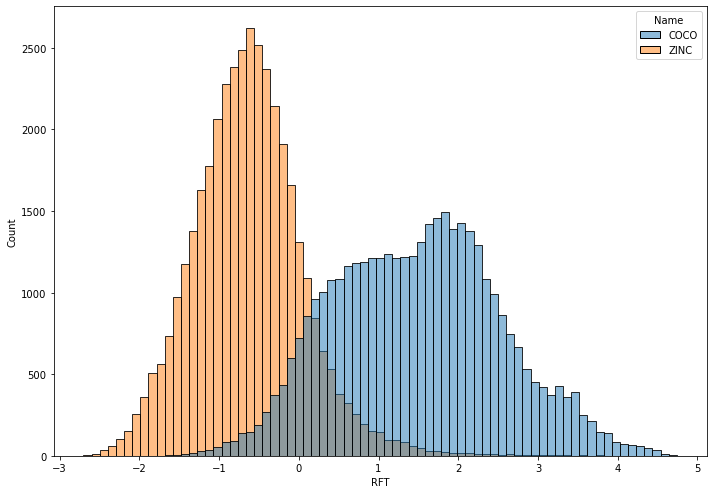

In [33]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')
plt.savefig(f"../images//joint_samples_RFT.svg", format="svg")

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between ChEMBL and ZINC datasets, based on their radius 1 fragments. Larger fragments might diverge even further.

<AxesSubplot:xlabel='RFT', ylabel='Count'>

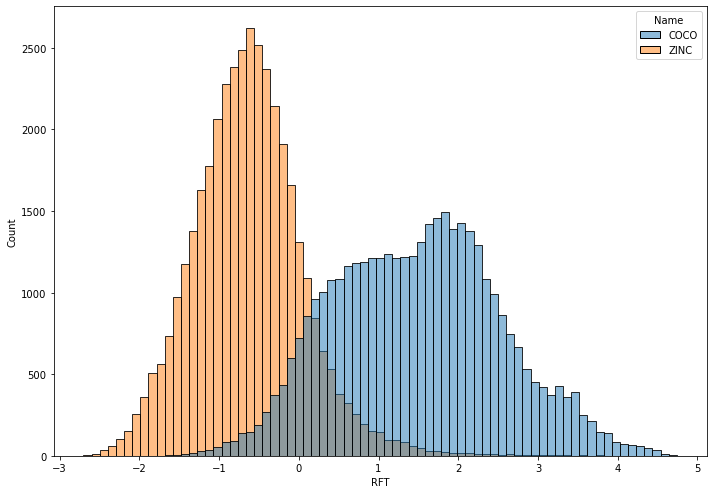

In [34]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(joint_samples, x='RFT', hue='Name')

According to the histogram, there is a visible split between Relative feature tightness distribution against the pointwise KL divergence profile between ChEMBL and ZINC datasets, based on their radius 1 fragments. Larger fragments might diverge even further.